# HandWritten Digit Recognization Using Deep Neural Networking Concepts





In [1]:
from __future__ import print_function
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import cv2
from keras.datasets import mnist # helps in loading the MNIST dataset
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
from keras.utils import plot_model
#from keras.utils.np_utils import probas_to_classes

%matplotlib inline 

random.seed(63)  

# No of rows and columns in the image
img_rows = 28
img_cols = 28

#No of output classes (0-9)
nb_classes = 10

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")
# Show the number of rows and columns 
print("Row pixels in each image : {}.".format(X_train.shape[1]))
print("Column pixels in each image : {}.".format(X_train.shape[2]))
print("\n")
print("Successfully Downloaded and Loaded the dataset")

Training set has 60000 samples.
Testing set has 10000 samples.


Row pixels in each image : 28.
Column pixels in each image : 28.


Successfully Downloaded and Loaded the dataset


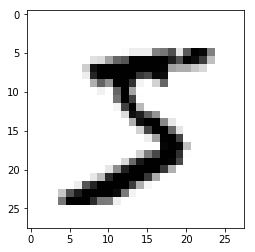

In [3]:
# Show the handwritten image
plt.imshow(X_train[0], cmap=cm.binary)

In [4]:
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
print("The data is reshaped to the respective format!" , input_shape)
X_train = X_train.astype('float32') #converted to float so that it can hold floating values between 0-1
X_test = X_test.astype('float32') #converted to float so that it can hold floating values between 0-1
X_train /= 255
X_test /= 255
print("In Integer form : ", y_train,y_test)

Y_train = np_utils.to_categorical(y_train, nb_classes) #converted to their binary forms
Y_test = np_utils.to_categorical(y_test, nb_classes) #converted to their binary forms

print("In Binary form : ", Y_train,Y_test)
print("Preprocessing of Data is Done Successfully...")

The data is reshaped to the respective format! (28, 28, 1)
In Integer form :  [5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]
In Binary form :  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Preprocessing of Data is Done Successfully...


In [5]:
pool_size = (2, 2)
kernel_size = (3, 3)

model = Sequential()

model.add(Convolution2D(32, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

print("Successfully built the DNN Model!")

/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  


Successfully built the DNN Model!


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
             )
print("Model Compilation completed!")

Model Compilation completed!


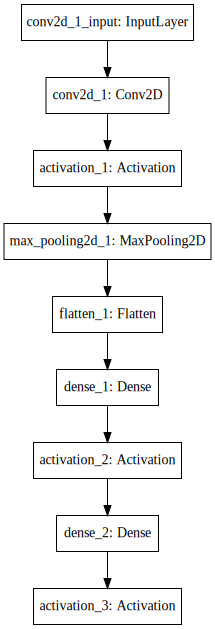

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [8]:
batch_size = 128
nb_epoch=10 

start = time.time()
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1,validation_data=(X_test, Y_test))
done = time.time()

elapsed = (done - start)/60

print("Model trained Successfully : Took - {} mins!".format(elapsed))

/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.9345 - acc: 0.7783 - val_loss: 0.3713 - val_acc: 0.8986
Epoch 2/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3410 - acc: 0.9025 - val_loss: 0.2967 - val_acc: 0.9166
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.2879 - acc: 0.9169 - val_loss: 0.2587 - val_acc: 0.9264
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2570 - acc: 0.9252 - val_loss: 0.2319 - val_acc: 0.9323
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2325 - acc: 0.9322 - val_loss: 0.2143 - val_acc: 0.9374
Epoch 6/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2130 - acc: 0.9385 - val_loss: 0.1952 - val_acc: 0.9434
Epoch 7/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1967 - acc: 0.9430 - val_loss: 0.1788 - val_acc

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss Value:', score[0])
print('Test Accuracy Value:', score[1])

Test Loss Value: 0.16348371871039272
Test Accuracy Value: 0.9516


In [10]:
pool_size = (2, 2)
kernel_size = (3, 3)

rmodel = Sequential()

rmodel.add(Convolution2D(32, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
rmodel.add(Activation('relu'))
rmodel.add(Convolution2D(64, kernel_size[0], kernel_size[1]))
rmodel.add(Activation('relu'))
rmodel.add(MaxPooling2D(pool_size=pool_size))
rmodel.add(Dropout(0.25))

rmodel.add(Flatten())
rmodel.add(Dense(128))
rmodel.add(Activation('relu'))
rmodel.add(Dropout(0.5))
rmodel.add(Dense(nb_classes))
rmodel.add(Activation('softmax'))

print("Successfully built the Refined DNN Model!")

/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  
/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


Successfully built the Refined DNN Model!


Refined Model Compilation completed!


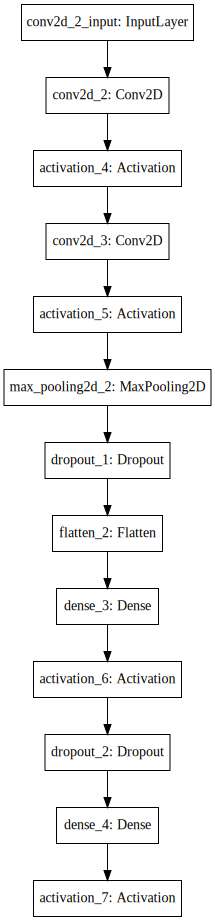

In [11]:
rmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print("Refined Model Compilation completed!")
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(rmodel).create(prog='dot', format='svg'))

In [12]:
batch_size = 128
nb_epoch=10 

start = time.time()
rmodel.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
done = time.time()

elapsed = (done - start)/60

print("Refined Model trained Successfully : Took - {} mins!".format(elapsed))

/home/nisha/anaconda2/envs/tensorflow/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 530s 9ms/step - loss: 0.2380 - acc: 0.9279 - val_loss: 0.0534 - val_acc: 0.9817
Epoch 2/10
60000/60000 [==============================] - 560s 9ms/step - loss: 0.0843 - acc: 0.9751 - val_loss: 0.0375 - val_acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 611s 10ms/step - loss: 0.0642 - acc: 0.9806 - val_loss: 0.0351 - val_acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 642s 11ms/step - loss: 0.0526 - acc: 0.9844 - val_loss: 0.0316 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 553s 9ms/step - loss: 0.0463 - acc: 0.9856 - val_loss: 0.0296 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 562s 9ms/step - loss: 0.0388 - acc: 0.9882 - val_loss: 0.0302 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 498s 8ms/step - loss: 0.0359 - acc: 0.9883 - val_loss: 0.0341 

In [19]:
score = rmodel.evaluate(X_test, Y_test, verbose=0)
print('Test Loss Value:', score[0])
print('Test Accuracy Value:', score[1])
import os, os.path

imgs = []
path = "/home/nisha/dlnd/Hand-writing-recog/images"
count=0
for f in os.listdir(path):
    imgs.append(cv2.imread(os.path.join(path,f)))
    count+=1
print("Successfully loaded {} images".format(count))

Test Loss Value: 0.02539899214704874
Test Accuracy Value: 0.993
Successfully loaded 7 images


In [20]:
X_pred = []

for img in imgs:
    # Convert the color image to rgb
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Invert black and white color(since in opencv white is considered 255 and black 0 but we need vice versa in order to match with the dataset)
    invert_gray = (255-gray)
    # Resize the image to 28,28 pixels as per the mnist dataset format
    resized = cv2.resize(invert_gray, (28, 28))

    # Convert the image format from (28,28) to (28,28,1) in order for the model to recognize
    resized = np.asarray(resized)
    resized.shape+=1,
    
    #scale the color channel from 0-255 to 0-1
    resized=resized/255
    
    X_pred.append(resized)
    
X_pred = np.asarray(X_pred)
print(X_pred.shape)

(7, 28, 28, 1)


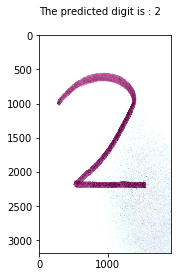

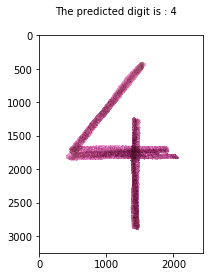

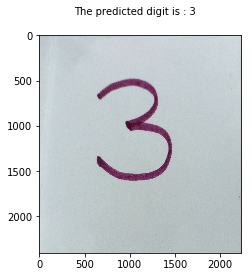

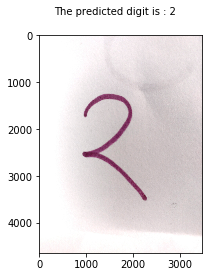

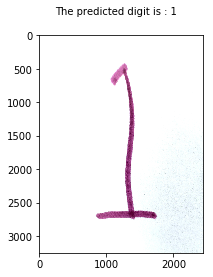

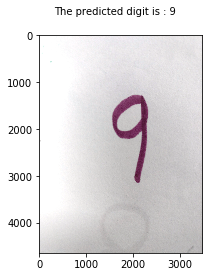

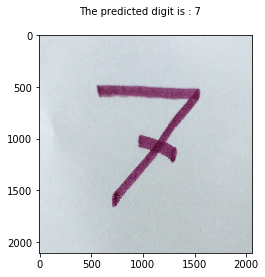

In [21]:
# Predict the output
#from keras.utils.np_utils import probas_to_classes
#proba = rmodel.predict(X_pred)
# Convert the predicted output to respective integer number
answers = rmodel.predict_classes(X_pred)

#plot the image and the predicted number
i=0
for img in imgs:
    plt.figure()
    plt.imshow(img, cmap=cm.binary)
    plt.suptitle("The predicted digit is : " + str(answers[i]))
    i+=1